https://www.fmf.uni-lj.si/~jazbinsek/Praktikum5/gammaenergies.pdf

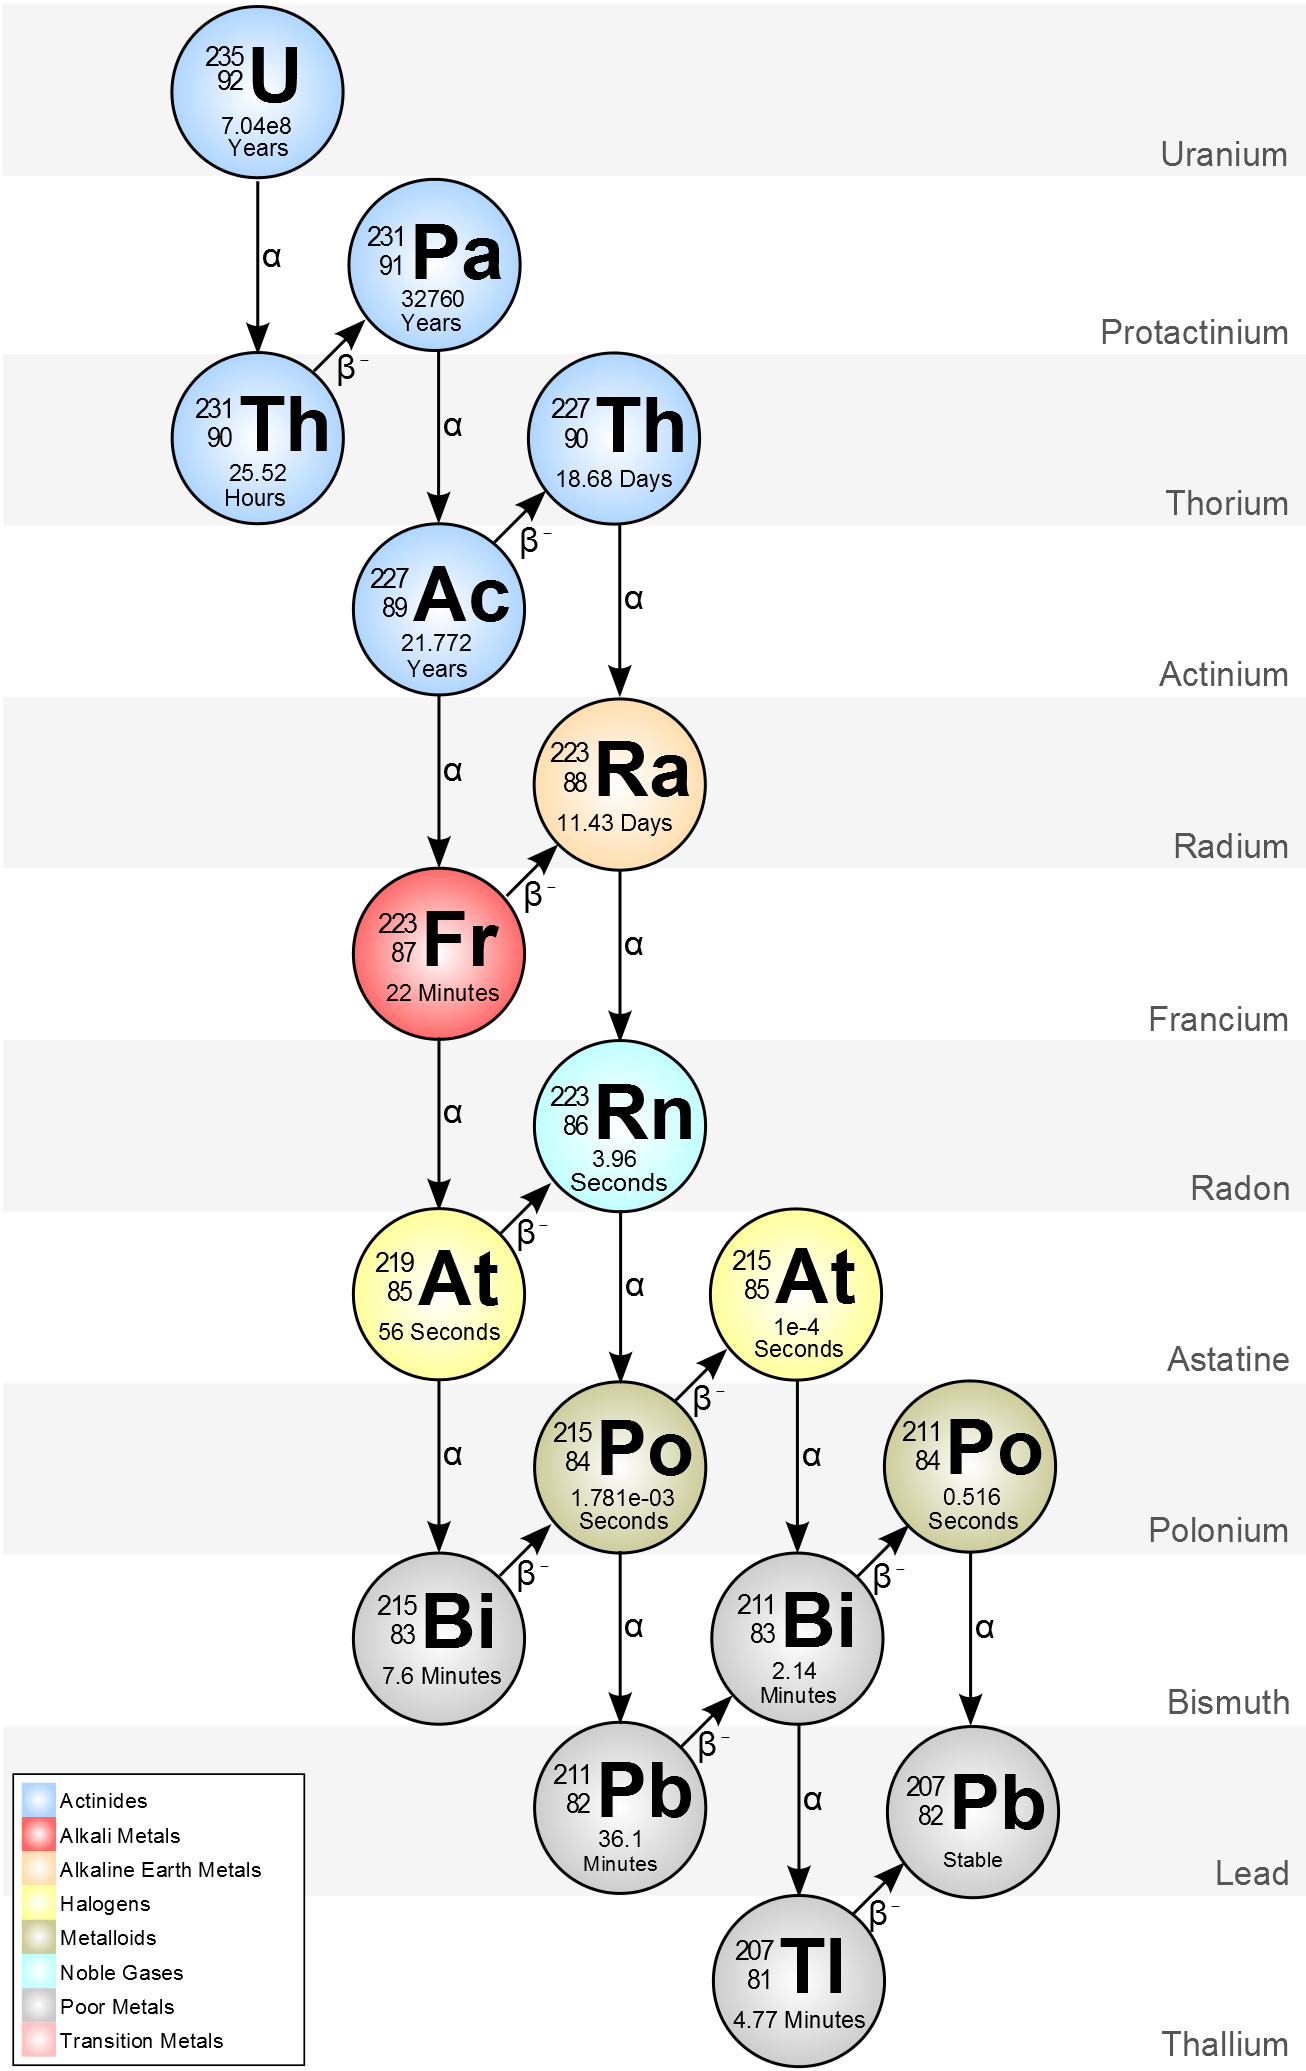

Expected peaks (keV):

U-238:

2204.2 (5) Bi-214

1764.5 (15.8) Bi-214

1238.1 (5.9) Bi-214

1120.3 (15.1) Bi-214

609.3*(46.3) Bi-214

352.0*(37.2) Pb-214

295.2 (19.2) Pb-214

92.6*(5.4) Th-234

63.3 (3.8) Th-234

46.5*(3.9) Pb-21


U-235:

401.8 (6.5) Rn-219

271.2*(10.6) Rn-219

269.5*(13.6) Ra-223

236*(11.5) Th-227

210.6 (11.3) Th-227

185.7*(54) U-235


Return table of channel number vs energy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

csv = np.genfromtxt('uranium_test_2019-02-19_D3S.csv', delimiter= ",").T

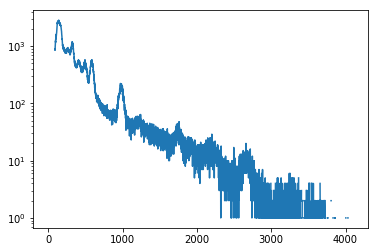

In [3]:
summed = np.sum(csv, axis=1)
plt.plot(summed)
plt.yscale('log')
plt.show()

In [4]:
def fitFunc(x, a, m, s, c):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c
def linBgFitFunc(x, a, m, s, c, b):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c + b * x
def find(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    trydata = fitFunc(xSlice, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50)
    p0 = [trymax,trymu,trysig,trybg]
    xpopt, xpcov = curve_fit(fitFunc, xxdata, xSlice, p0)
    print(xpopt)
    
    #plt.plot(xxdata, xSlice)
    #plt.plot(xxdata, fitFunc(xxdata, *xpopt))
    #plt.plot(int(xpopt[1]), fitFunc(xxdata, *xpopt)[int(xpopt[1])], 'ro')

    xchannel = xshift + int(xpopt[1])
    return xchannel
    #plt.show()
def linBgFind(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5, trylin=-20):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    #trydata = fitFunc(xSlice, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50)
    p0 = [trymax,trymu,trysig,trybg, trylin]
    xpopt, xpcov = curve_fit(linBgFitFunc, xxdata, xSlice, p0)
    print(xpopt)
    
    #plt.plot(xxdata, xSlice)
    #plt.plot(xxdata, fitFunc(xxdata, *xpopt))
    #plt.plot(int(xpopt[1]), fitFunc(xxdata, *xpopt)[int(xpopt[1])], 'ro')

    xchannel = xshift + int(xpopt[1])
    return xchannel
def showFindFit(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5, lin=1):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    #trydata = linBgFitFunc(1, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50, lin)
    p0 = [trymax,trymu,trysig,trybg, lin]
    xpopt, xpcov = curve_fit(linBgFitFunc, xxdata, xSlice, p0)
    print(xpopt)
    
    #plt.plot(xxdata, xSlice)
    #plt.plot(xxdata, fitFunc(xxdata, *xpopt))
    #plt.plot(int(xpopt[1]), fitFunc(xxdata, *xpopt)[int(xpopt[1])], 'ro')

    xchannel = xshift + int(xpopt[1])
    return linBgFitFunc(xxdata, *xpopt)

[  13.0565526   155.88040582  153.65065496    1.64613439]
2155


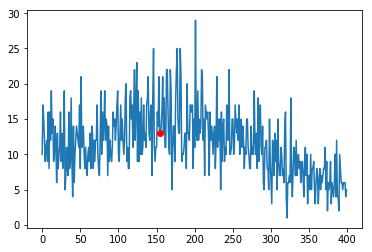

In [5]:
#the plan is to just automate this block of code
Bi_shift = 2000
Bi_range = 400
Bi_slice = summed[Bi_shift:Bi_shift+Bi_range]
plt.plot(Bi_slice)
Bi_find = find(Bi_slice, Bi_shift)
print(Bi_find)
plt.plot(Bi_find- Bi_shift, Bi_slice[Bi_find- Bi_shift], 'ro')
plt.show()

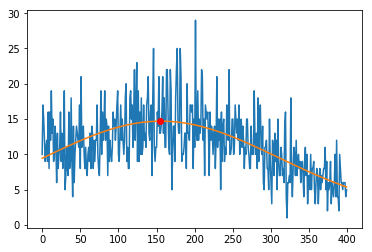

In [6]:
#This block is redundant to the one above but we can see the fitting function here
Bi_mu = np.mean(Bi_slice)
Bi_sig = np.std(Bi_slice)
Bi_xdata = range(len(Bi_slice))
trydata = fitFunc(Bi_slice, np.max(Bi_slice), Bi_mu, Bi_sig, np.max(Bi_slice) + 50)
p0 = [Bi_mu,Bi_mu,100,5]
Bi_popt, Bi_pcov = curve_fit(fitFunc, Bi_xdata, Bi_slice, p0)
plt.plot(Bi_xdata, Bi_slice)
plt.plot(Bi_xdata, fitFunc(Bi_xdata, *Bi_popt))
plt.plot(int(Bi_popt[1]), fitFunc(Bi_xdata, *Bi_popt)[int(Bi_popt[1])], 'ro')
Bi_channel = Bi_shift + int(Bi_popt[1])
plt.show()


[  15.18555224  141.79029266   37.69128217   17.78478019]
1741


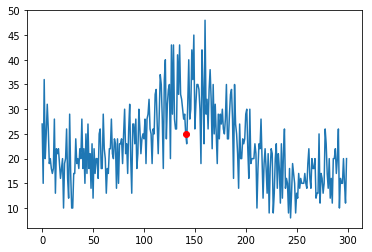

In [7]:
Bi2_shift = 1600
Bi2_range = 300
Bi2_slice = summed[Bi2_shift:Bi2_shift+Bi2_range]
plt.plot(Bi2_slice)
Bi2_find = find(Bi2_slice, Bi2_shift)
print(Bi2_find)
plt.plot(Bi2_find-Bi2_shift, Bi2_slice[Bi2_find-Bi2_shift], 'ro')

plt.show()

[  18.01454929  103.28650192   75.88181804   28.42573805]
1203


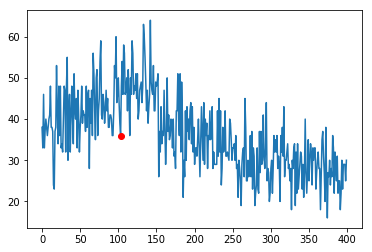

In [8]:
Bi3_shift = 1100
Bi3_range = 400
Bi3_slice = summed[Bi3_shift:Bi3_shift+Bi3_range]
plt.plot(Bi3_slice)
Bi3_find = find(Bi3_slice, Bi3_shift)
print(Bi3_find)
plt.plot(Bi3_find-Bi3_shift, Bi3_slice[Bi3_find-Bi3_shift], 'ro')

plt.show()

[ 151.73454794   80.15552973   29.55333653   44.84798396]
980


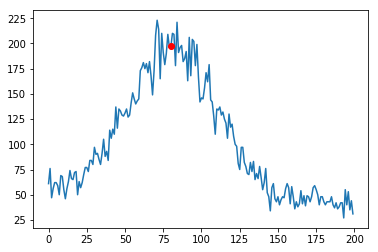

In [9]:
Bi4_shift = 900
Bi4_range = 200
Bi4_slice = summed[Bi4_shift:Bi4_shift+Bi4_range]
plt.plot(Bi4_slice)
Bi4_find = find(Bi4_slice, Bi4_shift)
print(Bi4_find)
plt.plot(Bi4_find-Bi4_shift, Bi4_slice[Bi4_find-Bi4_shift], 'ro')

plt.show()

[ 412.14947471   43.78304231  -22.8951626   129.1928381 ]
583


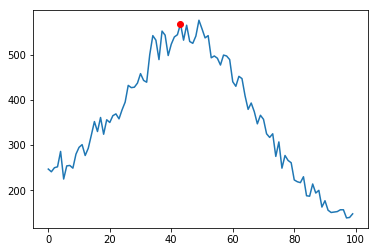

In [10]:
Bi5_shift = 540
Bi5_range = 100
Bi5_slice = summed[Bi5_shift:Bi5_shift+Bi5_range]
plt.plot(Bi5_slice)
Bi5_find = find(Bi5_slice, Bi5_shift)
print(Bi5_find)
plt.plot(Bi5_find-Bi5_shift, Bi5_slice[Bi5_find-Bi5_shift], 'ro')

plt.show()

[ 498.43123198   74.43803936   12.94756178  926.1886955    -3.94678696]
[ 498.43099369   74.43803355  -12.94759177  926.18853755   -3.94678805]


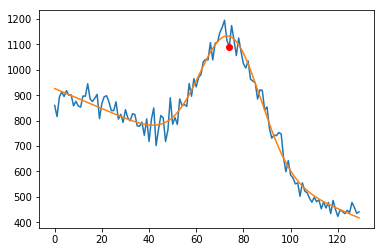

In [11]:
Pb_shift = 250
Pb_range = 130
Pb_slice = summed[Pb_shift:Pb_shift+Pb_range]
plt.plot(Pb_slice)
Pb_find = linBgFind(Pb_slice, Pb_shift, 1200, 60, 80, 20)
#print(Pb_find)
plt.plot(Pb_find-Pb_shift, Pb_slice[Pb_find-Pb_shift], 'ro')
plt.plot(showFindFit(Pb_slice, Pb_shift, 1200, 60, 30, 500, -30))

plt.show()

[ 2700.43232809    79.95328054    32.79058142  -389.90968313     6.06259979]


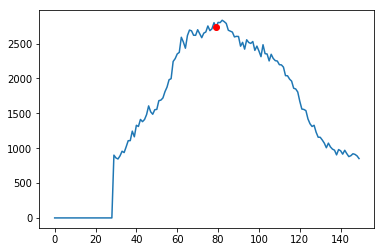

In [12]:
Th_shift = 60
Th_range = 150
Th_slice = summed[Th_shift:Th_shift+Th_range]
plt.plot(Th_slice)
Th_find = linBgFind(Th_slice, Th_shift, 1200, 60, 80, 20)
#print(Th_find)
plt.plot(Th_find-Th_shift, Th_slice[Th_find-Th_shift], 'ro')
#plt.plot(showFindFit(Th_slice, Th_shift, 1200, 60, 30, 500, -30))

plt.show()

1741


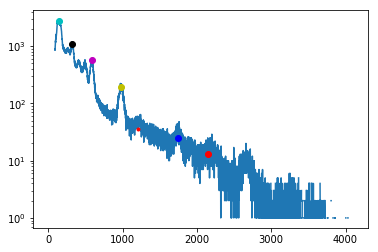

In [13]:
plt.plot(summed)
plt.plot(Bi_find, summed[Bi_find], 'ro') #2204.2 UNUSED
plt.plot(Bi2_find, summed[Bi2_find], 'bo') #1120.3
plt.plot(Bi3_find, summed[Bi3_find], 'r.') # UNUSED
plt.plot(Bi4_find, summed[Bi4_find], 'yo') #609.3
plt.plot(Bi5_find, summed[Bi5_find], 'mo') #352
plt.plot(Pb_find, summed[Pb_find], 'ko') #185.7
plt.plot(Th_find, summed[Th_find], 'co') #92.6
print(Bi2_find)

plt.yscale('log')

plt.show()


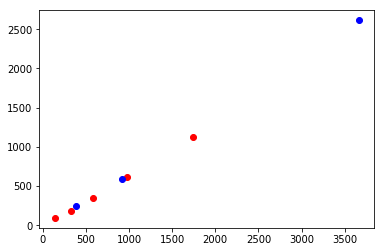

[1741, 980, 583, 324, 139]


In [18]:
channels = [Bi2_find, Bi4_find, Bi5_find, Pb_find, Th_find]
Th_channels = [390, 925, 3666]
#channels = channels + Th_channels

energies = [1120.3, 609.3, 352, 185.7, 92.6]
Th_energies = [238.6, 583.1, 2614.7]



plt.plot(channels, energies, 'ro')
plt.plot(Th_channels, Th_energies, 'bo')
plt.show()
print(channels)


[  5.80899642e-01   4.97812684e+00   3.56962797e-05]


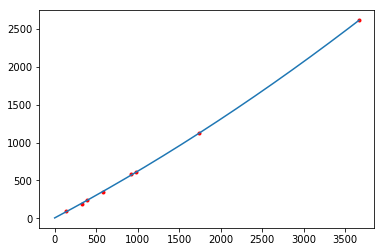

In [15]:
combChannels = channels + Th_channels
combEnergies = energies + Th_energies

plt.plot(combChannels, combEnergies, 'r.')
def linfit(x, m, b):
    return m*x + b
def polyfit(x, m, b, r):
    return r * x*x + m*x + b
p0 = [1, .6, 2]
xpopt, xpcov = curve_fit(polyfit, combChannels, combEnergies, p0)
print(xpopt)
plt.plot(polyfit(range(max(combChannels)), *xpopt))
plt.show()

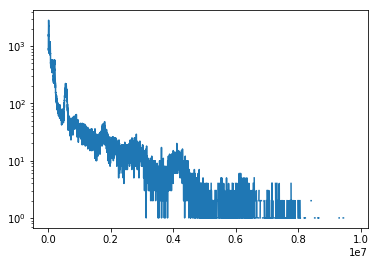

In [16]:
plt.plot([i*i*0.58 + 4.97*i + 3.5e-5 for i in range(len(summed))], [summed[i] for i in range(len(summed))])
plt.yscale('log')
plt.show()

In [17]:
i=len(summed)
i*i*0.58 + 4.97*i + 3.5e-5

9751142.400034998